In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Activity 1

In [42]:
def load_and_preprocess_data():
    # Load MNIST dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    
    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

In [44]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [46]:
def train(model, x_train, y_train, x_test, y_test):
    # Train the model
    history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       verbose=1)
    return history

In [48]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

In [50]:
model=create_model()

C:\Users\trial\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
history = train(model, x_train, y_train, x_test, y_test)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8055 - loss: 0.6095 - val_accuracy: 0.9638 - val_loss: 0.1199
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9597 - loss: 0.1333 - val_accuracy: 0.9661 - val_loss: 0.1111
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9709 - loss: 0.0986 - val_accuracy: 0.9705 - val_loss: 0.0944
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9778 - loss: 0.0739 - val_accuracy: 0.9744 - val_loss: 0.0892
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9806 - loss: 0.0622 - val_accuracy: 0.9793 - val_loss: 0.0757
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9840 - loss: 0.0497 - val_accuracy: 0.9772 - val_loss: 0.0827
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9872 - loss: 0.0401 - val_accuracy: 0.9783 - val_loss: 0.0811
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9885 - loss: 0.0370 - val_accu

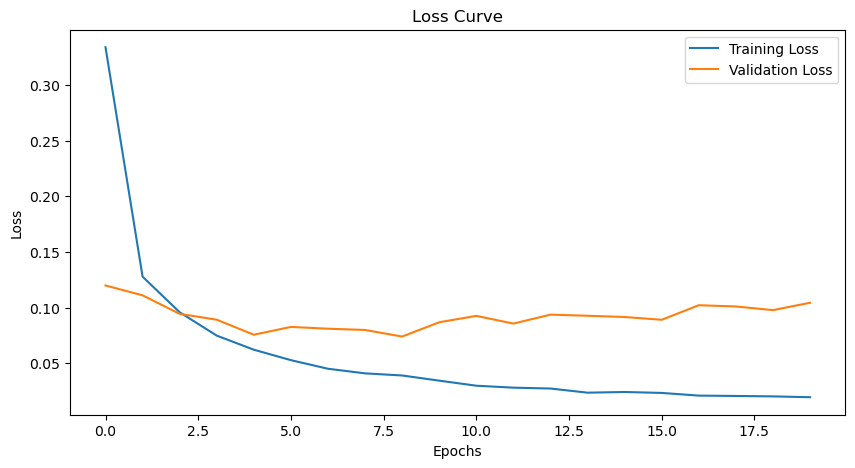

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

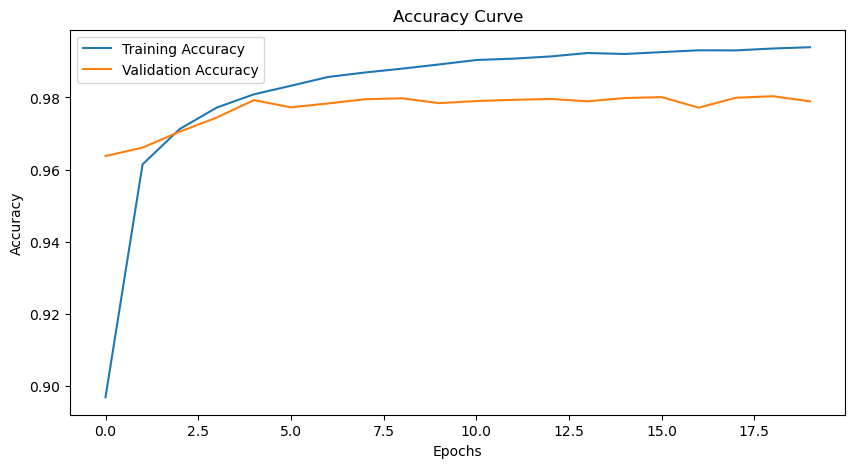

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [28]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


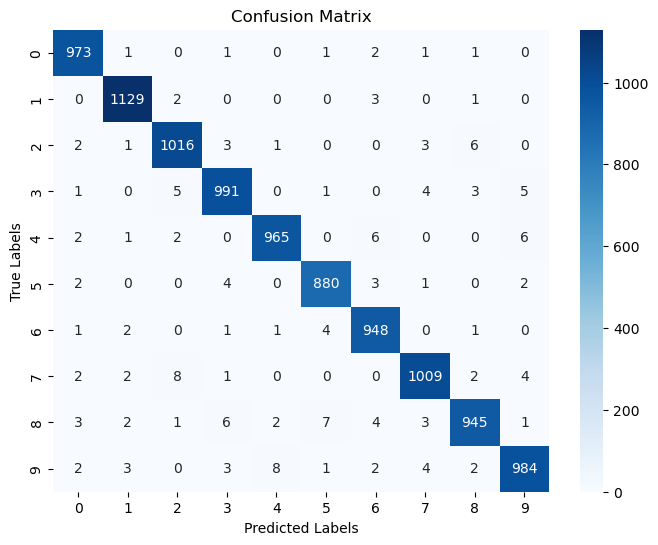

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
from sklearn.metrics import classification_report
classification_report(y_test_classes, y_pred_classes)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99       980\n           1       0.99      0.99      0.99      1135\n           2       0.98      0.98      0.98      1032\n           3       0.98      0.98      0.98      1010\n           4       0.99      0.98      0.99       982\n           5       0.98      0.99      0.99       892\n           6       0.98      0.99      0.98       958\n           7       0.98      0.98      0.98      1028\n           8       0.98      0.97      0.98       974\n           9       0.98      0.98      0.98      1009\n\n    accuracy                           0.98     10000\n   macro avg       0.98      0.98      0.98     10000\nweighted avg       0.98      0.98      0.98     10000\n'

### Activity 2

In [99]:
def load_and_preprocess_data_2():
    # Load CIFAR10 dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    
    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # Reshape images to 1D arrays
    x_train = x_train.reshape(-1, 32*32*3)
    x_test = x_test.reshape(-1, 32*32*3)
    
    # One-hot encode labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

In [79]:
def create_model_2():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [81]:
def train_2(model, x_train, y_train, x_test, y_test):
    # Train the model
    history = model.fit(x_train, y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       verbose=1)
    return history

In [83]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data_2()

In [85]:
model=create_model_2()

In [87]:
history = train_2(model, x_train, y_train, x_test, y_test)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.1944 - loss: 2.1861 - val_accuracy: 0.3402 - val_loss: 1.8337
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3122 - loss: 1.8963 - val_accuracy: 0.3539 - val_loss: 1.8042
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.3326 - loss: 1.8303 - val_accuracy: 0.3884 - val_loss: 1.7270
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.3568 - loss: 1.7757 - val_accuracy: 0.3929 - val_loss: 1.7062
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3638 - loss: 1.7536 - val_accuracy: 0.4018 - val_loss: 1.6792
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.3776 - loss: 1.7267 - val_accuracy: 0.4159 - val_loss: 1.6620
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3840 - loss: 1.7146 - val_accuracy: 0.4111 - val_loss: 1.6520
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.3858 - loss: 1.6998 - val_acc

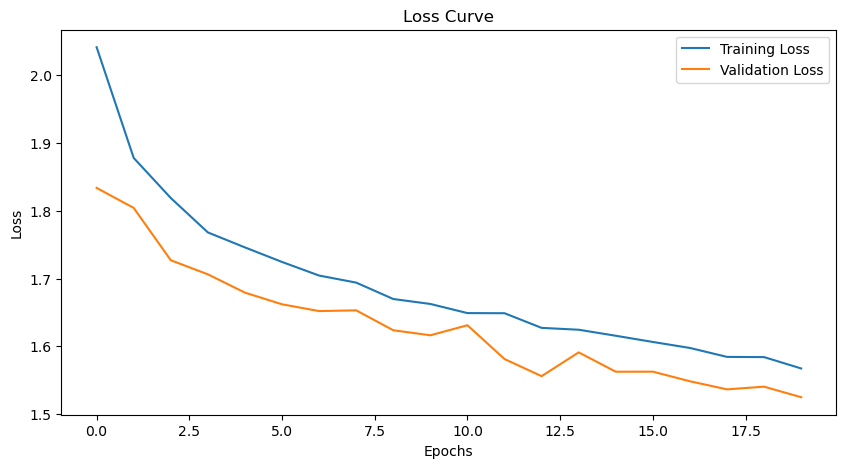

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

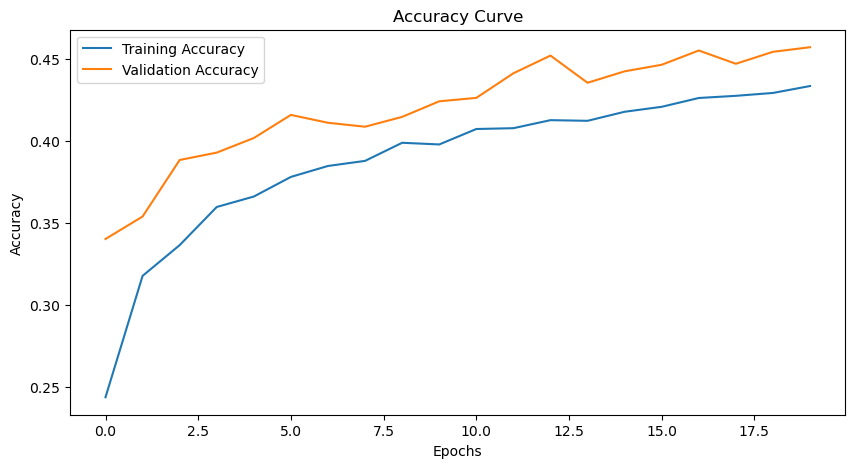

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

In [93]:
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


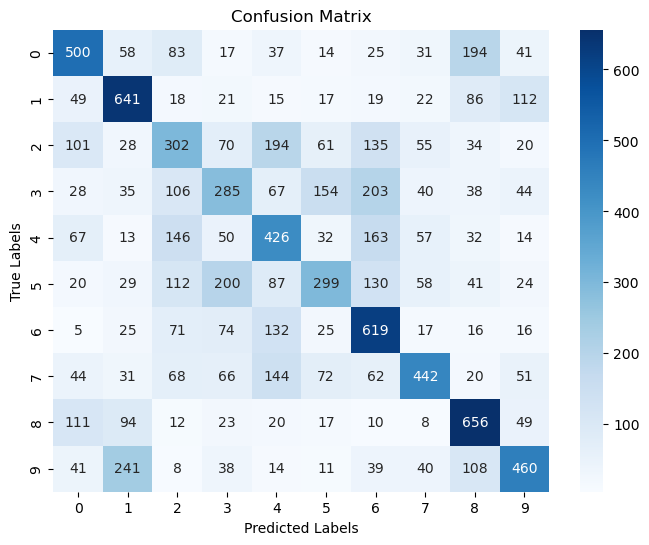

In [95]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [97]:
classification_report(y_test_classes, y_pred_classes)

'              precision    recall  f1-score   support\n\n           0       0.52      0.50      0.51      1000\n           1       0.54      0.64      0.58      1000\n           2       0.33      0.30      0.31      1000\n           3       0.34      0.28      0.31      1000\n           4       0.38      0.43      0.40      1000\n           5       0.43      0.30      0.35      1000\n           6       0.44      0.62      0.51      1000\n           7       0.57      0.44      0.50      1000\n           8       0.54      0.66      0.59      1000\n           9       0.55      0.46      0.50      1000\n\n    accuracy                           0.46     10000\n   macro avg       0.46      0.46      0.46     10000\nweighted avg       0.46      0.46      0.46     10000\n'